In [1]:
import numpy as np
import matplotlib.pyplot as plt


import astropy.units as u
from uncertainties import ufloat
from uncertainties import unumpy as unp
%matplotlib inline 
from astropy.io import fits

from spectra import make_DF_from_GBM
from spectra import plot_Flux_Energy 
from spectra_LAT import plot_Flux_Energy_LAT 
from Sensitivity import plot_Sens
from Sensitivity import plot_ctools_Crab, plot_HEGRA_Crab
from Fitting_models import Plaw_LAT
tugreen = '#73ae14'

# <font color = #73ae14>   Relevance of spectra for simulation

- Does it make sense to put the Crab spectrum into the tool? 
- What is the similarity among the transients? 
- What would spectrum look like in GEV-TEV range anyway? Is it detectable then? 

# <font color = #73ae14> ---> 1. Course / Shape 


### Currently used: Crab Spectrum
### A) ctools Version & B) HEGRA measurement 
plot_ctools_Crab(logEmin,logEmax,SED) or plot_HEGRA_CRAB(logEmin,logEmax,SED)
          - logEmin = lower limit of plotting interval, in logscale: 4 means 10^4 
          - logEmax = higher limit of plotting interval
          - SED = boolean, if True show E² * diff. Flux 

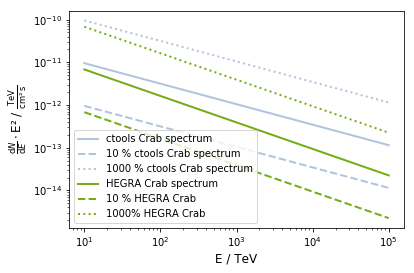

In [2]:
plot_ctools_Crab(1,5,True)
plt.ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E} \cdot$E² / $\frac{\mathrm{TeV}}{\mathrm{cm}²\,\mathrm{s}}$', fontsize=12)
plot_HEGRA_Crab(1,5,True)

## LAT und GMB catalogs
- plot_Sens(scale,style), show sensitivity in $E² \cdot$ diff. Flux
        
       - Scale : Scale of x-axis, Kev,Mev,GeV as a string 
       - Style: energy bins or curve, string: binwise or curve 
- plot_Flux_Energy(GRB_name, Dataframe,loglow,loghigh, SED,EBL,Redshift,plot_col)
- plot_Flux_Energy_LAT(GRB_name,loglow,loghigh, SED,EBL,Redshift,plot_col)

       - GRB_name : sections from the name of GRB, e.g. '090902' or '0902' etc.
       - Dataframe: For GBM data, first execute make_DF_from_GBM with GRBST.fits and give that DF to function 
       - loglow: lower energy threshold in logscale, 5 gives 10^5 etc.  
       - loglow: higher energy threshold for plot 
       - SED: Boolean, if True show E² *diff.flux 
       - EBL: Boolean, if True show absorption in EBL 
       - Redshift : int, neded for EBL calculations 
       - plot_col: RGB or python color names, plotting color 


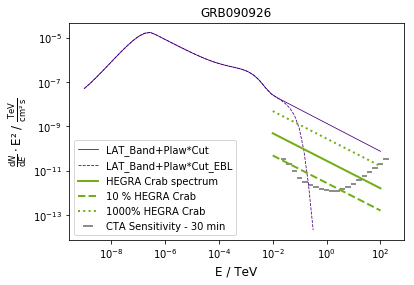

In [3]:
plot_Sens('Tev','binwise')
plot_Flux_Energy_LAT('GRB090926',-9,2,True,False,0,'indigo')
plot_Flux_Energy_LAT('GRB090926',-9,-0.5,True,True,2.14,'indigo')
plot_HEGRA_Crab(-2,2,True)

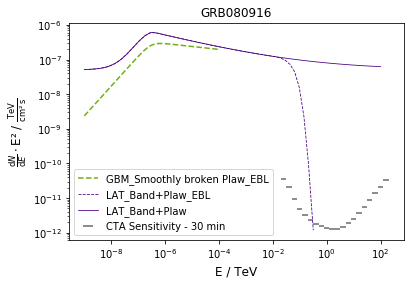

In [12]:
Table = make_DF_from_GBM('Kataloge/GRBST.fits')
plot_Flux_Energy('080916',Table,-9,-4,True,True,1.1,tugreen)
plot_Flux_Energy_LAT('GRB080916',-9,-0.5,True,True,1.99,'indigo')
plot_Flux_Energy_LAT('GRB080916',-9,2,True,False,1.99,'indigo')
plot_Sens('Tev','binwise')

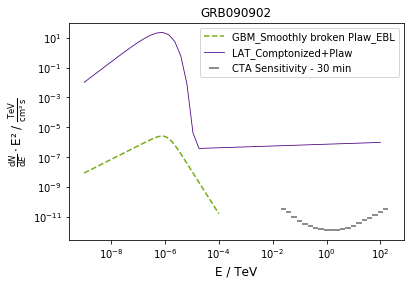

In [3]:
Table = make_DF_from_GBM('Kataloge/GRBST.fits')
plot_Flux_Energy('090902',Table,-9,-4,True,True,1.1,tugreen)
plot_Flux_Energy_LAT('GRB090902',-9,2,True,False,1.99,'indigo')
plot_Sens('Tev','binwise')

##  Measured spectra from galactic transients and short AGNs 

### 1. PKS2155, measured flare 2006 

Text(0.5,0,'E / GeV')

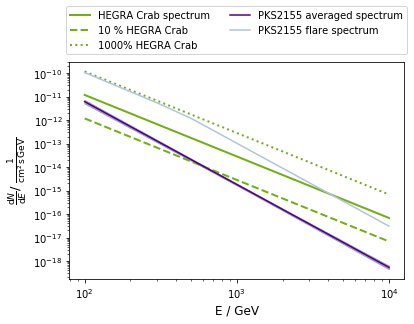

In [143]:
Phi0 = ufloat(1.81e-15,0.13e-15)
alpha = ufloat(3.53,0.06)
E0 = 1000 #

Phi0_Flare = ufloat(2.06e-13,0.16e-13)
alpha_Flare = ufloat(2.71,0.06)
beta_Flare= ufloat(3.53,0.05)
EB_Flare = ufloat(430,22) # GeV 


Eplot = np.linspace(100,10000)

def Plaw_u(E,E0,Phi,alpha):
    return Phi*(E/E0)**(-alpha)
@np.vectorize
def Broken(E,E0,EB,Phi,alpha1,alpha2):
    if E <= EB:
        return Phi*(E/E0)**(-alpha1)
    else:
        return Phi*(EB/E0)**(alpha2-alpha1)*(E/E0)**(-alpha2)

Results = Plaw_u(Eplot,E0,Phi0,alpha)
Values = unp.nominal_values(Results)
Errors = unp.std_devs(Results)

Results_Flare = Broken(Eplot,E0,EB_Flare,Phi0_Flare,alpha_Flare,beta_Flare)
Values_Flare = unp.nominal_values(Results_Flare)
Errors_Flare = unp.std_devs(Results_Flare)

plot_HEGRA_Crab(2,4,False)

plt.plot(Eplot,Values, color='indigo',label='PKS2155 averaged spectrum')
plt.fill_between(Eplot,Values-Errors, Values+Errors,color='indigo', alpha=0.6)

plt.plot(Eplot,Values_Flare, color='lightsteelblue',label='PKS2155 flare spectrum')
plt.fill_between(Eplot,Values-Errors, Values+Errors,color='lightsteelblue', alpha=0.6)

plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(-0.025, 1.01, 1., .101),ncol=2)
plt.ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E}$/ $\frac{1}{\mathrm{cm}²\,\mathrm{s} \, \mathrm{GeV}}$', fontsize=13)
plt.xlabel('E / GeV')

### 2. LS I+61°303, MAGIC measurement 
X-ray binary with VHE gamma-rays 

Text(0.5,0,'E / GeV')

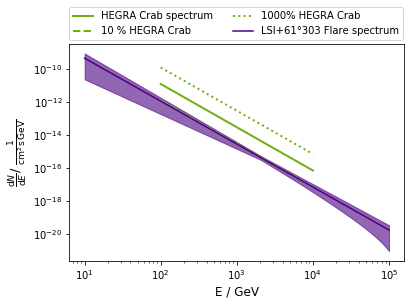

In [191]:
#Simple Power Law 
Phi0 = ufloat(2.7e-15,0.6e-15)
alpha = ufloat(2.6,0.2)

Eplot = np.linspace(10,100000)
plot_HEGRA_Crab(2,4,False)

Results = Plaw_u(Eplot,E0,Phi0,alpha)
Values_LS = unp.nominal_values(Results)
Errors_LS = unp.std_devs(Results)

plt.plot(Eplot,Values_LS, color='indigo',label='LSI+61°303 Flare spectrum')
plt.fill_between(Eplot,Values_LS-Errors_LS, Values_LS+Errors_LS,color='indigo', alpha=0.6)

plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(0.01, 1.09, 1., .101),ncol=2)
plt.ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E}$/ $\frac{1}{\mathrm{cm}²\,\mathrm{s} \, \mathrm{GeV}}$', fontsize=13)
plt.xlabel('E / GeV')

### 3. HESSJ0632+057 / *Fermi*J032.6+057

Text(0.5,0,'E / GeV')

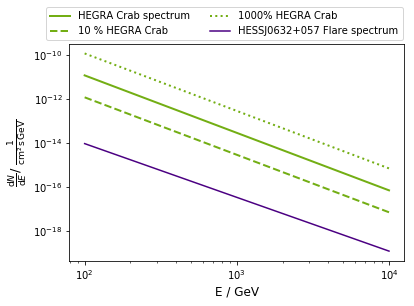

In [145]:
# Simple Power Law
from scipy.constants import e as elem
from scipy.integrate import quad 
Flux = ufloat(0.71e-11,0.15e-11)*1e-16/elem # GeV 
alpha = ufloat(2.45,0.05)
E0 = 1000


def Plaw(E,E0,Phi,alpha):
    return Phi*(E/E0)**(-alpha)*E
# Flux to Differential Flux 
Int = quad(Plaw,0.1,300,args=(E0,1,alpha.n)) ; Integral = ufloat(Int[0],Int[1])
Phi0 = Flux/(Integral)


Eplot = np.linspace(100,10000)
plot_HEGRA_Crab(2,4,False)

Results = Plaw_u(Eplot,E0,Phi0,alpha)
Values = unp.nominal_values(Results)
Errors = unp.std_devs(Results)

plt.plot(Eplot,Values, color='indigo',label='HESSJ0632+057 Flare spectrum')
#plt.fill_between(Eplot,Values-Errors, Values+Errors,color='indigo', alpha=0.6)

plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(0.01, 1.09, 1., .101),ncol=2)
plt.ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E}$/ $\frac{1}{\mathrm{cm}²\,\mathrm{s} \, \mathrm{GeV}}$', fontsize=13)
plt.xlabel('E / GeV')

### 4. IC 310 Flare, MAGIC measurement 

Text(0.5,0,'E / GeV')

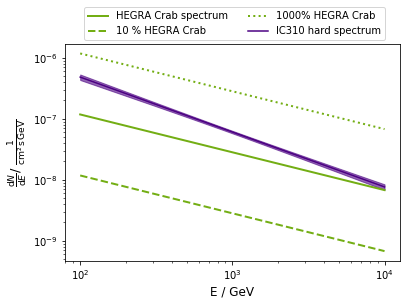

In [160]:
Phi0 = ufloat(6.08e-11,0.29e-11)/1## per cm² time, not per energy or *energy 
alpha = ufloat(1.90,0.04)

Eplot = np.linspace(100,10000)
plot_HEGRA_Crab(2,4,True)

Results = Plaw(Eplot,E0,Phi0,alpha)
Values = unp.nominal_values(Results)
Errors = unp.std_devs(Results)

plt.plot(Eplot,Values, color='indigo',label='IC310 hard spectrum')
plt.fill_between(Eplot,Values-Errors, Values+Errors,color='indigo', alpha=0.6)

plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(-0.03, 1.09, 1., .101),ncol=2)
plt.ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E}$/ $\frac{1}{\mathrm{cm}²\,\mathrm{s} \, \mathrm{GeV}}$', fontsize=13)
plt.xlabel('E / GeV')

##  List of LAT GRBs announced via CGN notices von *Fermi* results

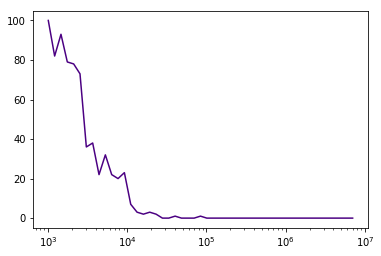

In [173]:
Datei = fits.open('FERMI/LLE_GRBs/GRB090902/LLE/gll_pha_bn110721200_v02.fit',ignore_missing_end=True)
Spec = Datei['SPECTRUM'] ## Counts vs Channal 
C = Spec.data['CHANNEL']
N = Spec.data['COUNTS']

Bound = Datei['EBOUNDS'] ## Channal vs Energie 
C_cal = Bound.data['CHANNEL']

Min = Bound.data['E_MIN']
Max = Bound.data['E_MAX']
Energy = (Max-Min)/2
plt.plot(Energy[0:len(Energy)-1],N[0:len(Energy)-1],'-', color='indigo') 
plt.xscale('log')

## To be compared

/home/jana/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:2876: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


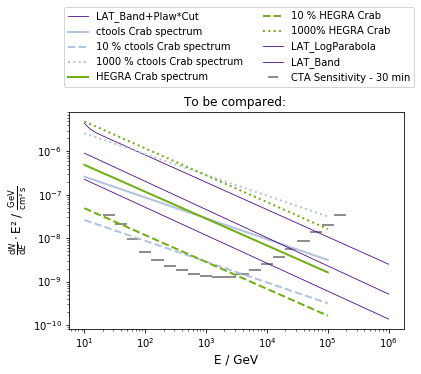

In [174]:
plot_Sens('Gev','binwise')
plot_Flux_Energy_LAT('GRB090926',1,6,True,False,0,'indigo') ## Exponential LC 
plot_ctools_Crab(1,5,True)
plot_HEGRA_Crab(1,5,True)
plot_Flux_Energy_LAT('GRB110721',1,6,True,False,0,'indigo') ## Schmnaler Gauß 
plot_Flux_Energy_LAT('GRB091003',1,6,True,False,0.9,'indigo')
xdata = np.logspace(3,9,1000)
plt.title('To be compared: ')
plt.savefig('Plots/Spectrum_Vergleich.pdf')
plt.legend(bbox_to_anchor=(-0.03, 1.09, 1., .101),ncol=2)

# <font color = #73ae14> ---> 2. Amplitude / Strength

### Which assumptions are realistic for times and strengths? 

Comparison with Crab? 
- 1 erg = $0.1 \mu$J (1 eV = $1.602 \cdot 10^{-19} $J)
- Fluence in erg/cm² = Energy per area 
- flow in erg/cm² s divided by mean duration 

How to reach Crab Unit for energy range in different units:
- Crab spectrum in about the energy range = $\frac{\mathrm{d}N}{\mathrm{d}E}$
- Use the energy sought and CU in the unit photons per (energy cm² s) 
- integral over E$_{min}$ to E$_{max}$ corresponds to counts per cm² s = photons per (cm² s)
- Integrate again via energy for CU in Erg pro (cm² s)

In [181]:
### From GBM 
from astropy.io import fits
Datei = fits.open('Kataloge/GRBST.fits',ignore_missing_end=True)
Katalog = Datei['FERMIGBRST']
Times =  Katalog.data['T90']
### Fluence from GBM 
Fluence =  Katalog.data['FLUENCE']  ## Flux integrated over burst duration in 10kev-1000kev Band in erg/cm² 
print('Averaged Fluence 10 keV to 1 MeV', Fluence.mean(), 'erg / cm²')
print('Averaged (Fluence devided by duration)', (Fluence/Times).mean(), 'Erg / cm²s')
print('Averaged Fluence  devided by averaged duration', Fluence.mean()/Times.mean(), 'Erg / cm²s')
print('--------------------------------------------------------------------')
### Peak Flux from GBM between 10-1000 keV in 1024 ms timescale in PHOTON/CM^2/S
Peak = Katalog.data['FLUX_1024']
print('Averaged PeakFlux between 10 and 1000 keV: ', Peak.mean(), 'Photons /cm²s')
print('Minimum PeakFlux between 10 and 1000 keV: ', Peak.min(), 'Photons /cm²s')
print('Maximum PeakFlux between 10 and 1000 keV: ', Peak.max(), 'Photons /cm²s')
print('---------------------------------------------------------------------')

### LAT Catalog
Datei = fits.open('Kataloge/FermiLGRB.fits',ignore_missing_end=True)

Katalog = Datei['FERMILGRB']
EMax = Katalog.data['MAX_ENERGY']
Fluence = Katalog.data['FLUENCE']

### Energy from  LAT Catalog 
print('Averaged maximum Energy of the burst in GeV = ', EMax.mean(), ' GeV')
print('--------------------------------------------------------------')
## Fluence from LAT in 10 keV - 10 GeV 
print('Averaged Fluence in erg/cm²', Fluence.mean())

Mittlere Fluence 10 keV bis 1 MeV 1.4741059288e-05 erg / cm²
Mittlere Fluence durch Dauer 1.08935347867e-06 Erg / cm²s
Mittlere Fluence durch mittlere Dauer 3.97454513413e-07 Erg / cm²s
--------------------------------------------------------------------
Mittlerer PeakFluss zwischen 10 und 1000 keV:  9.8238898 Photons /cm²s
Minimaler PeakFluss zwischen 10 und 1000 keV:  0.3491 Photons /cm²s
Maximaler PeakFluss zwischen 10 und 1000 keV:  1051.86 Photons /cm²s
---------------------------------------------------------------------
Mittlere maximale Energie in GeV =  4.85171428571  GeV
--------------------------------------------------------------
Mittlere Fluence in erg/cm² 7.066e-05


## Vergleich in Crab Units 

/home/jana/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:2876: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


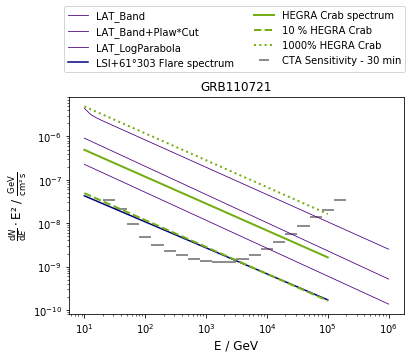

In [193]:
plot_Flux_Energy_LAT('GRB091003',1,6,True,False,1.99,'indigo')
plot_Flux_Energy_LAT('GRB090926',1,6,True,False,1.99,'indigo')
plot_Flux_Energy_LAT('GRB110721',1,6,True,False,1.99,'indigo')
Eplot = np.linspace(10,100000)
plt.plot(Eplot,Values_LS*Eplot*Eplot, color='navy',label='LSI+61°303 Flare spectrum')
plot_Sens('Gev','binwise')
plot_HEGRA_Crab(1,5,True)
plt.legend(bbox_to_anchor=(-0.03, 1.09, 1., .101),ncol=2)